In [42]:
import numpy as np                   # Numerical computation library
import pandas as pa                  # Dataframe and Data manipulation Library
import matplotlib.pyplot as plt      # Basic plotting functionality Library
import seaborn as sn                 # Advanced Data visualization Library
import numpy.random as rn
from sklearn.linear_model import LinearRegression
import matplotlib.colors as pltco # A package to help with coloring plots


[x for x in dir(list) if not '__' in x]
  
# Curreny Exchange Rates compared to the US dollar from around the world 22 for 2008-2018
projection_central_data = pa.read_csv('https://www.dropbox.com/s/emd7111t9g0rtd2/career_projections_group.csv?dl=1')
bls_data = pa.read_csv('https://www.dropbox.com/s/w1zzumsadlgg9pn/Colorado_Current_Workforce_Demographic.csv?dl=1')

projection_central_data = projection_central_data.drop(0)

projection_central_data = projection_central_data.dropna(axis=1)

bls_data = bls_data.drop(0)
bls_data = bls_data.dropna(axis=1)

In [84]:
projection_central_data.head()

,State FIPS,Area Name,Occupation Code,Occupation Name,Base Year,Base,Projected Year,Projection,Change,Percent Change,Average Annual Openings
1,8,Colorado,111011,Chief Executives,2018,1290,2020,1310,20,1.6,100
2,8,Colorado,111021,General and Operations Managers,2018,46420,2020,48450,2030,4.4,4830
3,8,Colorado,111031,Legislators,2018,720,2020,750,30,4.2,60
4,8,Colorado,112011.,Advertising and Promotions Managers,2018,590,2020,610,20,3.4,70
5,8,Colorado,112021.,Marketing Managers,2018,3460,2020,3610,150,4.3,370


In [85]:
projection_central_data.dtypes

State FIPS                   int64
Area Name                   object
Occupation Code             object
Occupation Name             object
Base Year                    int64
Base                         int64
Projected Year               int64
Projection                   int64
Change                       int64
Percent Change             float64
Average Annual Openings      int64
dtype: object

In [87]:
bls_data_numeric.dtypes

OCC_CODE     float64
OCC_TITLE     object
OCC_GROUP     object
TOT_EMP      float64
EMP_PRSE     float64
JOBS_1000    float64
LOC_Q        float64
H_MEAN       float64
A_MEAN       float64
MEAN_PRSE    float64
H_PCT10      float64
H_PCT25       object
H_MEDIAN      object
H_PCT75       object
H_PCT90       object
A_PCT10       object
A_PCT25       object
A_MEDIAN      object
A_PCT75       object
A_PCT90       object
dtype: object

In [44]:
bls_data.head()

,AREA,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_Q,...,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
1,8,CO,Colorado,11-0000,Management Occupations,major,"116,770",1.1,44.556,0.85,...,26.78,38.28,56.15,78.38,#,"55,700","79,630","116,800","163,030",#
2,8,CO,Colorado,11-1011,Chief Executives,detailed,570,5.3,0.216,0.16,...,40.92,56.83,86.63,#,#,"85,110","118,210","180,190",#,#
3,8,CO,Colorado,11-1021,General and Operations Managers,detailed,"39,200",1.9,14.958,0.95,...,22.27,32.52,51.51,81.71,#,"46,310","67,650","107,140","169,970",#
4,8,CO,Colorado,11-1031,Legislators,detailed,630,8.0,0.239,0.69,...,*,*,*,*,*,"21,230","23,970","48,260","68,270","100,430"
5,8,CO,Colorado,11-2011,Advertising and Promotions Managers,detailed,390,25.9,0.147,0.84,...,27.10,45.76,58.58,68.07,87.05,"56,380","95,180","121,850","141,580","181,070"


In [45]:
bls_data = bls_data.replace('-','',regex=True)
bls_data = bls_data.replace(',','',regex=True)
bls_data = bls_data.replace('*',np.nan)
bls_data = bls_data.replace('**',np.nan)
bls_data = bls_data.replace('#',np.nan,regex=True)

In [81]:
projection_central_data = projection_central_data.replace('-','',regex=True)

In [53]:
#bls_data = bls_data.drop(['AREA','STATE','ST'], axis=1)

bls_data_clean = bls_data.dropna(axis=0)
bls_data.shape

(755, 20)

In [50]:
bls_data_clean.head()

,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_Q,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
5,112011,Advertising and Promotions Managers,detailed,390,25.9,0.147,0.84,59.12,122970,7.1,27.10,45.76,58.58,68.07,87.05,56380,95180,121850,141580,181070
8,112031,Public Relations and Fundraising Managers,detailed,1240,4.6,0.474,0.95,65.86,136990,2.1,36.52,45.86,61.70,78.47,98.37,75970,95390,128330,163210,204600
9,113011,Administrative Services Managers,detailed,2390,3.2,0.913,0.47,57.52,119650,1.7,30.26,41.16,54.48,70.10,87.39,62940,85620,113320,145800,181770
12,113051,Industrial Production Managers,detailed,1160,4.8,0.441,0.35,61.72,128380,2.4,30.50,41.67,56.35,74.97,97.65,63430,86670,117200,155940,203100
13,113061,Purchasing Managers,detailed,800,4.7,0.307,0.64,69.27,144090,1.8,44.21,54.89,64.82,78.24,96.96,91950,114160,134820,162730,201680


In [52]:
bls_data_clean.shape   ## Lost 132 rows due to NaN values in the data frame. I removed the whole row if any column cotained such a value

(622, 20)

In [66]:
bls_data_numeric = bls_data_clean

In [75]:
bls_data_numeric['OCC_CODE'] = bls_data_clean.iloc[:,0:1].astype(float)
bls_data_numeric.loc[:,3:11] = bls_data_clean.iloc[:,3:11].astype(float)

/Users/Luke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [80]:
bls_data_numeric.head()

,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_Q,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
5,112011.0,Advertising and Promotions Managers,detailed,390.0,25.9,0.147,0.84,59.12,122970.0,7.1,27.10,45.76,58.58,68.07,87.05,56380,95180,121850,141580,181070
8,112031.0,Public Relations and Fundraising Managers,detailed,1240.0,4.6,0.474,0.95,65.86,136990.0,2.1,36.52,45.86,61.70,78.47,98.37,75970,95390,128330,163210,204600
9,113011.0,Administrative Services Managers,detailed,2390.0,3.2,0.913,0.47,57.52,119650.0,1.7,30.26,41.16,54.48,70.10,87.39,62940,85620,113320,145800,181770
12,113051.0,Industrial Production Managers,detailed,1160.0,4.8,0.441,0.35,61.72,128380.0,2.4,30.50,41.67,56.35,74.97,97.65,63430,86670,117200,155940,203100
13,113061.0,Purchasing Managers,detailed,800.0,4.7,0.307,0.64,69.27,144090.0,1.8,44.21,54.89,64.82,78.24,96.96,91950,114160,134820,162730,201680


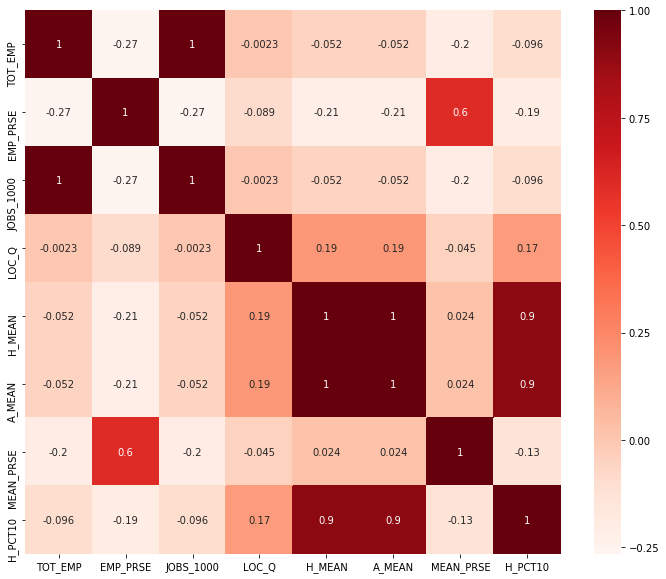

In [90]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = bls_data_numeric[['TOT_EMP', 'EMP_PRSE', 'JOBS_1000', 'LOC_Q', 'H_MEAN', 'A_MEAN', 'MEAN_PRSE', 'H_PCT10']].corr()
sn.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [92]:
#Correlation with output variable
cor_target = abs(projection_central_data["Projection"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features;

In [93]:
X = bls_data_numeric[['TOT_EMP', 'EMP_PRSE', 'JOBS_1000', 'LOC_Q', 'H_MEAN', 'A_MEAN', 'MEAN_PRSE', 'H_PCT10']]   #Feature Matrix
y = projection_central_data["Projection"]          #Target Variable

In [95]:
import statsmodels.api as sm